# Xopt basic example

An Xopt problem can be described by a simple YAML file. Here we will demonstrate how this is used to optimize a well-known constrained multi-objective test function, TNK.

## TNK test function

The TNK function is defined with:

$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
# Import the class
from xopt import Xopt

In [2]:
!mkdir -p temp

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [3]:
# Make a proper input file.
YAML = """
xopt: {}
generator:
    name: random

evaluator:
    function: xopt.resources.test_functions.tnk.evaluate_TNK

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    objectives: {y1: MINIMIZE, y2: MINIMIZE}
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    linked_variables: {x9: x1}
    constants: {a: dummy_constant}

"""

In [4]:
# create Xopt object.
X = Xopt(YAML)

In [5]:
# Convenient representation of the state.
X


            Xopt 
________________________________           
Version: 0.5.0+104.gaf8ee7d.dirty
Data size: 0
Config as YAML:
xopt: {asynch: false, strict: false, dump_file: null, max_evaluations: null}
generator: {name: random}
evaluator:
  function: xopt.resources.test_functions.tnk.evaluate_TNK
  function_kwargs: {extra_option: abc, sleep: 0, random_sleep: 0}
  max_workers: 1
  executor: NormalExecutor
vocs:
  variables:
    x1: [0.0, 3.14159]
    x2: [0.0, 3.14159]
  constraints:
    c1: [GREATER_THAN, 0.0]
    c2: [LESS_THAN, 0.5]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constants: {a: dummy_constant}
  linked_variables: {x9: x1}


In [6]:
X.random_evaluate(10)

{'y1': array([1.46491625, 0.06779624, 1.78002768, 2.08753017, 0.02694074,
        1.08545818, 0.60901242, 0.09455726, 3.12220857, 0.35700177]),
 'y2': array([2.70563541, 2.00104993, 1.62548022, 1.90787294, 0.22343354,
        1.55441052, 1.22470204, 1.15524309, 2.91130889, 0.64551066]),
 'c1': array([ 8.47501937,  2.92312301,  4.73587489,  6.92251302, -0.91514152,
         2.68905911,  0.82545343,  0.31742355, 17.13912974, -0.4331685 ]),
 'c2': array([ 5.79589095,  2.43995099,  2.9051766 ,  4.50235826,  0.30027407,
         1.45454283,  0.53707675,  0.59372732, 12.69038835,  0.04162185]),
 'some_array': array([1, 2, 3])}

# Run Random data generation

In [7]:
# Take one step (generate a single point)
X.step()

In [8]:
# examine the results
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
1,2.342932,2.312747,dummy_constant,2.342932,2.342932,2.312747,9.738662,6.682447,"[1, 2, 3]",False,


In [9]:
# take a couple of steps and examine the results
for _ in range(10):
    X.step()
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
1,2.342932,2.312747,dummy_constant,2.342932,2.342932,2.312747,9.738662,6.682447,"[1, 2, 3]",False,
2,2.783804,0.371473,dummy_constant,2.783804,2.783804,0.371473,6.939973,5.232281,"[1, 2, 3]",False,
3,0.854244,1.330249,dummy_constant,0.854244,0.854244,1.330249,1.595088,0.814803,"[1, 2, 3]",False,
4,2.625216,1.795142,dummy_constant,2.625216,2.625216,1.795142,9.212824,6.193935,"[1, 2, 3]",False,
5,2.572399,1.653561,dummy_constant,2.572399,2.572399,1.653561,8.447495,5.625539,"[1, 2, 3]",False,
6,2.948624,0.117227,dummy_constant,2.948624,2.948624,0.117227,7.627664,6.142275,"[1, 2, 3]",False,
7,1.064323,2.734920,dummy_constant,1.064323,1.064323,2.734920,7.518465,5.313326,"[1, 2, 3]",False,
8,0.357485,0.671888,dummy_constant,0.357485,0.357485,0.671888,-0.423823,0.049856,"[1, 2, 3]",False,
9,1.615418,2.737898,dummy_constant,1.615418,1.615418,2.737898,9.168139,6.252347,"[1, 2, 3]",False,
10,1.793458,1.073320,dummy_constant,1.793458,1.793458,1.073320,3.438455,2.001730,"[1, 2, 3]",False,


# Plotting
Plot the objective results

<AxesSubplot:xlabel='y1', ylabel='y2'>

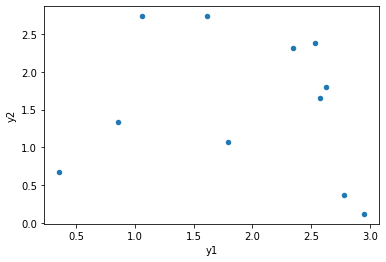

In [10]:
import matplotlib.pyplot as plt

X.data.plot(*X.vocs.objective_names, kind="scatter")

In [11]:
# Cleanup
!rm -r temp

# Alternative initialiation methods

For convenience, if the first (and only) positional argument is present, then Xopt will automatically try to load from JSON, YAML str or files, or as a dict.

In [12]:
import yaml
import json

config  = yaml.safe_load(YAML) 
# All these methods work

X = Xopt(YAML)
X = Xopt(config)
X = Xopt(json.dumps(config, indent=4))
